Importamos las librerias necesarias para ejecutar nuestro codigo, se esta usando python 3.12 como se especifico

In [1]:
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Creamos la funcion para generar nuestros datos aleatorios de altura y peso, pero teniendo en cuenta de que sean optimos para los datos, controlando el peso de los individuos usando el rango de IMC normal, que seria de 18.5 a 24.9.
Esta funcion nos devuelve un diccionario con la clave, siendo la altura, y el valor siendo el peso, para ordenarlos posteriormente
Recibe como parametro una lista, que calcula el prom de pesos de toda la informacion, y como es una lista, se esta pasando por referencia

In [2]:
def GenerarDatos(prompesos):
    datos: dict[float:float]
    datos = {}
    altura : float
    peso : float
    random.seed(5)
    for i in range(100):
        altura = random.randint(15000,20000)/100
        peso = random.randint(185, 249)/10 *(altura/100)**2
        prompesos[0] += peso
        datos[altura] = peso
    #print(datos)
    return datos

Creamos otra funcion para ordenar los pesos de acuerdo a las edades que se le pasaran de forma ascendente

In [3]:
def ordenarDatos(diccionario:dict,listAlt):
    listPes :list
    listPes = []
    for i in range(len(diccionario)):
        listPes.append(diccionario[listAlt[i]])
    return listPes

Para tener el codigo un poco mas ordenado, estoy declarando las variables y que tipos de datos seran los que almacenaran cada uno

In [4]:
#listas de datos
list_alturas : list
list_pesos :list
list_alturas = []
list_pesos = []
resta: float
sumErrores: float
ErrorMin : float
balance : list[int]
listVariables :list[float]
listVariables = [0,0]
PromPesos: list
PromPesos = [0]

Ahora se procede a llamar a la primera funcion para obtener todos los datos aleatorios de prueba, y con el metodo sorted, sacamos las claves del que serian las alturas, de manera creciente y ordenada

In [5]:

tabla = GenerarDatos(PromPesos)
list_alturas = sorted(tabla)
PromPesos[0] /= 100

ErrorMin = 999999
list_pesos = ordenarDatos(tabla,list_alturas)


Para la prueba decidi comparar los datos graficando todo en excel primero, si lo ven necesario activar el siguiente codigo
*Opcional

In [ ]:
# archivo excel
archivo = pd.DataFrame({'Alturas':list_alturas,'Pesos':list_pesos})
archivo.to_excel("Datos_Altura_peso.xlsx", index=False)

Ahora creamos los ciclos dos ciclos for para encontrar los valores de la pendiente, de la siguiente ecuacion 

### peso = i + altura * j
### y = b + mx

Para eso calculo primero el promedio de las alturas usando la formual de  
#### i+altura*j
Y luego lo resto con el peso para encontrar la diferencia mas minimia que seria un error de rangos aceptable


In [8]:

for i in range(-1000,1000):
    for j in range(-1000,1000):
        sumErrores = 0
        for d in range(len(list_alturas)):
            resta = (list_alturas[d]*j/100 +i/100)
            sumErrores += resta
        sumErrores = abs(PromPesos[0]- sumErrores/100)
        if ErrorMin > sumErrores:
            ErrorMin = sumErrores
            listVariables = [i/100,j/100]
print("Finaliza el ciclo")

Finaliza el ciclo


Ahora finalmente mostramos la grafica de la pendiente y los puntos de dispersion


[-9.91, 0.44]


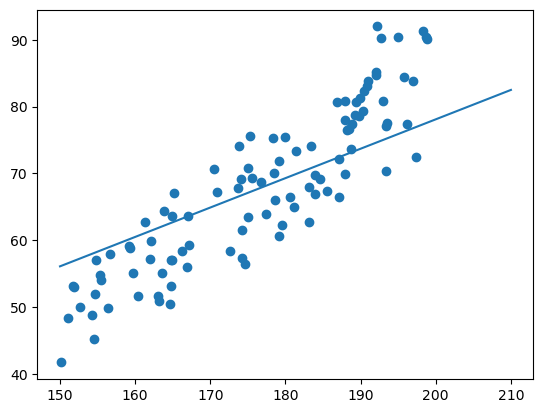

In [17]:

plt.scatter(list_alturas, list_pesos)  
print(listVariables)
m = listVariables[1]
b = listVariables[0]

x = np.linspace(150, 210, 100)
y = m * x + b
plt.plot(x, y, label=f'y = {m}x + {b}')